In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
Nx=100
Ny=5

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




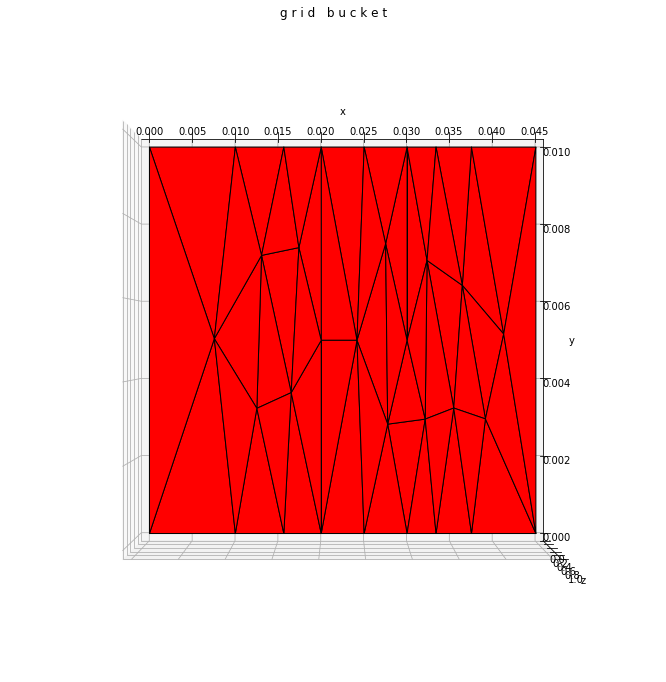

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.02, 'mesh_size_bound': 0.03}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
print(gb.edges)

<bound method GridBucket.edges of Grid bucket containing 3 grids and 2 interfaces
Maximum dimension present: 2 
Minimum dimension present: 1 
1 grids of dimension 2 with in total 48 cells
2 grids of dimension 1 with in total 2 cells
2 interfaces between grids of dimension 2 and 1 with in total 4 mortar cells
>


In [6]:
parameter={"aperture":1e-3,
           "fracture_perm":0.00001,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           "perm":0.3,
           #"perm":1,
          
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[3.0e-7,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

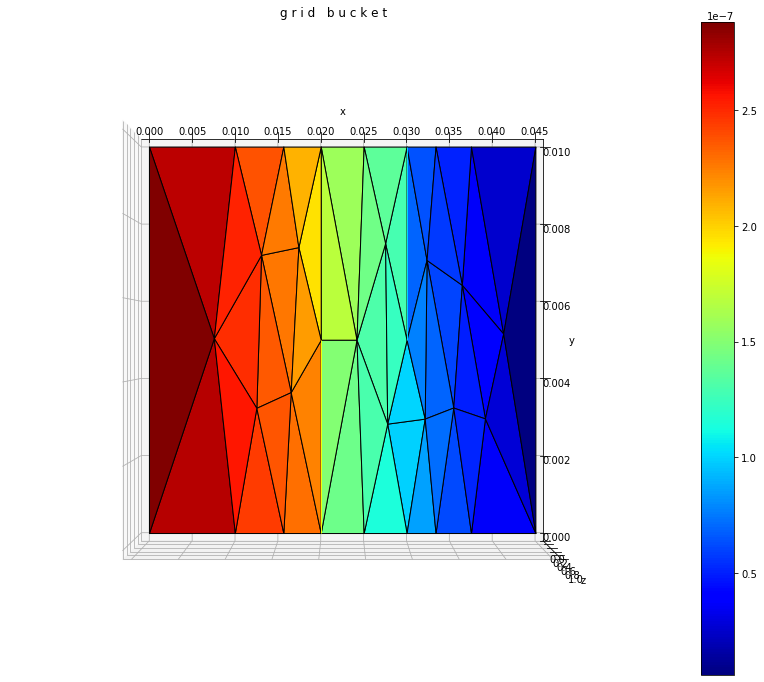

In [7]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [8]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [9]:
Ca_value=[1.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [10]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       "rate_const":0.0004466,
       #"rate_const":0.0,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.229802863847148e-06


In [11]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)
#ciao?1



mass
  (0, 0)	2.7861643848613653e-06
  (1, 1)	3.7500000000091506e-06
  (2, 2)	3.7500000000091565e-06
  (3, 3)	3.337113696168745e-06
  (4, 4)	7.43789767045292e-06
  (5, 5)	3.1250000000020343e-06
  (6, 6)	3.1250000000020343e-06
  (7, 7)	7.562102329547081e-06
  (8, 8)	5.443050197619333e-06
  (9, 9)	2.053046036562292e-06
  (10, 10)	1.9880022894997825e-06
  (11, 11)	2.7442012547763332e-06
  (12, 12)	1.7985094950760983e-06
  (13, 13)	2.0382451644717204e-06
  (14, 14)	1.1330191505250095e-05
  (15, 15)	2.011313668578292e-06
  (16, 16)	1.7443505626357734e-06
  (17, 17)	2.42205417330676e-06
  (18, 18)	2.215762880310235e-06
  (19, 19)	2.373639320514509e-06
  (20, 20)	1.8992227628849927e-06
  (21, 21)	2.3425434795172804e-06
  (22, 22)	2.380675469848415e-06
  (23, 23)	2.6198108644713737e-06
  (24, 24)	2.8810720992123863e-06
  (25, 25)	1.8749999999954165e-06
  (26, 26)	1.8749999999954201e-06
  (27, 27)	2.1227335371392196e-06
  (28, 28)	3.087704053347706e-06
  (29, 29)	1.4971380762246089e-06
  (30, 3

In [12]:
for g,d in gb:
    print(d[pp.PARAMETERS]["Ca"]["darcy_flux"])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.14026553e-09
  3.31509902e-09 -1.43940209e-08  6.13656460e-09  3.31139809e-09
 -8.46772675e-09  0.00000000e+00  2.47404812e-09 -8.07176256e-09
  7.77478541e-09 -2.70393465e-09  0.00000000e+00  0.00000000e+00
 -2.47702977e-09  2.70691629e-09 -1.43977219e-08  0.00000000e+00
 -7.06016702e-09  1.43977219e-08  0.00000000e+00  7.85963566e-09
  4.50200949e-09  0.00000000e+00  6.53808620e-09  0.00000000e+00
 -7.33755484e-09  0.00000000e+00  0.00000000e+00 -6.32297766e-09
  6.61995481e-09  0.00000000e+00  0.00000000e+00 -8.25745634e-09
 -5.92629419e-09  0.00000000e+00  5.53255376e-09 -4.50200949e-09
  0.00000000e+00 -3.96692911e-09  7.06016702e-09  0.00000000e+00
  6.53808620e-09 -4.64588978e-09  0.00000000e+00  7.33755484e-09
 -5.15319526e-09 -5.53255376e-09  6.61995481e-09 -6.32297766e-09
  6.14026553e-09  3.96692911e-09 -3.31509902e-09 -4.64588978e-09
  2.70691629e-09 -2.47702977e-09  8.25745634e-09  5.92629419e-09
  5.15319526e-09  4.21927

In [13]:
print(rhs_source_adv_Ca)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.97585268e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


P0_flux
[[ 1.31321665e-06  1.65149127e-06  1.22805311e-06  1.51770696e-06
   1.47976387e-06  2.87880419e-06  7.40185757e-10  1.40043735e-06
   1.35132815e-06  1.40783515e-06  1.52366139e-06  1.22452860e-06
   1.38371590e-06  1.25709171e-06  1.43977219e-06  1.70358475e-06
   5.96328667e-10  1.43200919e-06  1.29856450e-06  1.83904485e-06
   2.23504876e-06  1.37498273e-06  9.09177052e-07  7.40185757e-10
   1.52555026e-06  5.96328667e-10  9.90811906e-07  2.23402192e-06
   1.35158828e-06  2.23596765e-06  9.70847236e-07  9.23340821e-07
   1.59180343e-06  2.87880419e-06  2.09358006e-06  2.02262615e-06
   1.33261689e-06  1.24057225e-06  3.76642164e-06  1.03367647e-06
   1.37566192e-06  1.55710850e-06  1.31890939e-06  2.27884519e-06
   1.60371510e-06  1.35743474e-06  1.76247190e-06  1.43977219e-06]
 [ 4.91716291e-08 -1.79994501e-21  0.00000000e+00 -1.58818678e-22
   0.00000000e+00 -1.47277550e-06 -1.47277550e-06  0.00000000e+00
  -1.05879118e-22  2.50584890e-07 -5.90984608e-09 -1.56171700e-21
 

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


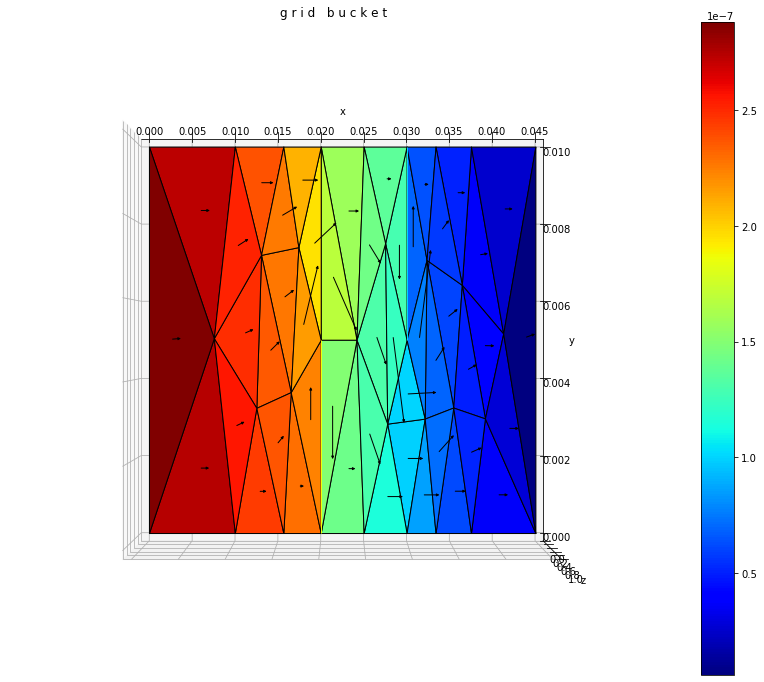

In [14]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=1000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

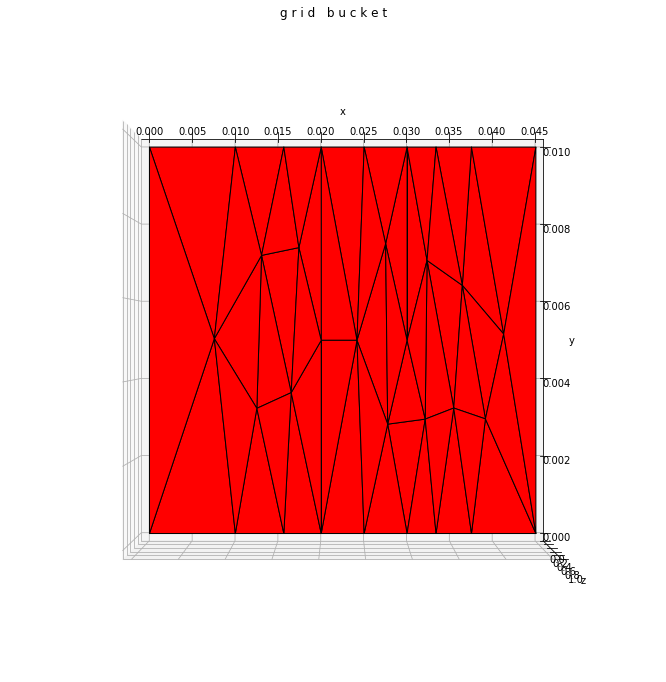

In [15]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.02, 'mesh_size_bound': 0.03}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [16]:
parameter={"aperture":1e-3,
           "fracture_perm":0.00001,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
           #"fracture_perm":1.0,
           "perm":0.3,
           #"perm":1.0,
           #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          #"bc_value":[3.0e-7,0.0],
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

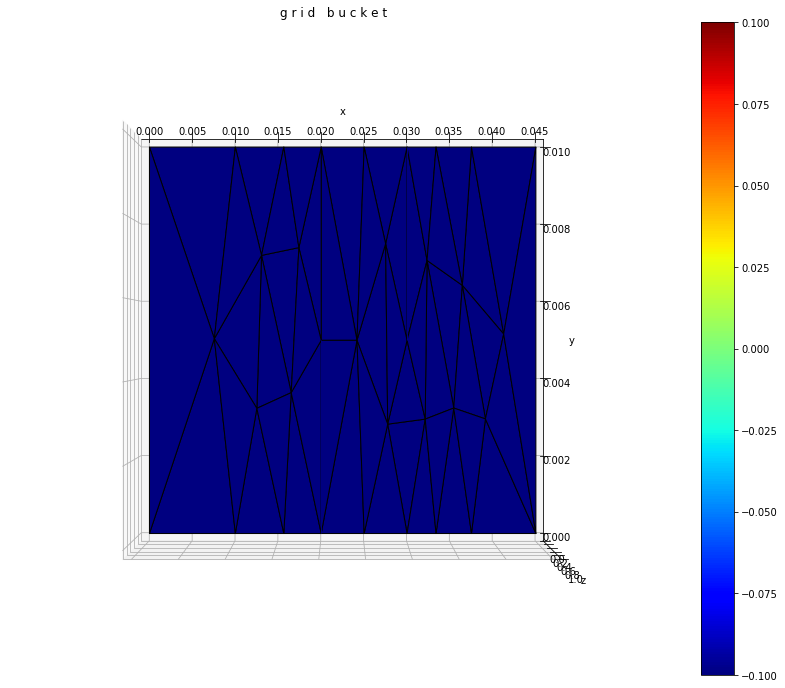

In [17]:
flow=Flow(gb1,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [18]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_CaSiO3=Transport(gb1,domain,parameter)

In [19]:
transport_CaSiO3.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_CaSiO3.get_flux(CaSiO3)    
transport_CaSiO3.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_CaSiO3.get_transport_lhs_rhs(CaSiO3)

mass
  (0, 0)	2.7861643848613653e-06
  (1, 1)	3.7500000000091506e-06
  (2, 2)	3.7500000000091565e-06
  (3, 3)	3.337113696168745e-06
  (4, 4)	7.43789767045292e-06
  (5, 5)	3.1250000000020343e-06
  (6, 6)	3.1250000000020343e-06
  (7, 7)	7.562102329547081e-06
  (8, 8)	5.443050197619333e-06
  (9, 9)	2.053046036562292e-06
  (10, 10)	1.9880022894997825e-06
  (11, 11)	2.7442012547763332e-06
  (12, 12)	1.7985094950760983e-06
  (13, 13)	2.0382451644717204e-06
  (14, 14)	1.1330191505250095e-05
  (15, 15)	2.011313668578292e-06
  (16, 16)	1.7443505626357734e-06
  (17, 17)	2.42205417330676e-06
  (18, 18)	2.215762880310235e-06
  (19, 19)	2.373639320514509e-06
  (20, 20)	1.8992227628849927e-06
  (21, 21)	2.3425434795172804e-06
  (22, 22)	2.380675469848415e-06
  (23, 23)	2.6198108644713737e-06
  (24, 24)	2.8810720992123863e-06
  (25, 25)	1.8749999999954165e-06
  (26, 26)	1.8749999999954201e-06
  (27, 27)	2.1227335371392196e-06
  (28, 28)	3.087704053347706e-06
  (29, 29)	1.4971380762246089e-06
  (30, 3

In [20]:
save_every = 1
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb1, file_name="CaSiO3", folder_name="CaSiO3")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [21]:
print(lhs_CaSiO3)

  (0, 0)	2.7861643848613653e-06
  (1, 1)	3.7500000000091506e-06
  (2, 2)	3.7500000000091565e-06
  (3, 3)	3.337113696168745e-06
  (4, 4)	7.43789767045292e-06
  (5, 5)	3.1250000000020343e-06
  (6, 6)	3.1250000000020343e-06
  (6, 51)	34.56
  (7, 7)	7.562102329547081e-06
  (8, 8)	5.443050197619333e-06
  (9, 9)	2.053046036562292e-06
  (10, 10)	1.9880022894997825e-06
  (11, 11)	2.7442012547763332e-06
  (12, 12)	1.7985094950760983e-06
  (13, 13)	2.0382451644717204e-06
  (14, 14)	1.1330191505250095e-05
  (15, 15)	2.011313668578292e-06
  (16, 16)	1.7443505626357734e-06
  (16, 53)	34.56
  (17, 17)	2.42205417330676e-06
  (18, 18)	2.215762880310235e-06
  (19, 19)	2.373639320514509e-06
  (20, 20)	1.8992227628849927e-06
  (21, 21)	2.3425434795172804e-06
  (22, 22)	2.380675469848415e-06
  :	:
  (33, 33)	1.9491348755789467e-06
  (34, 34)	1.7499920808482159e-06
  (35, 35)	1.5298698050839113e-06
  (36, 36)	3.0835828670977097e-06
  (37, 37)	2.4260033045028312e-06
  (38, 38)	1.3779657098336939e-06
  (39, 

In [22]:
print(lhs_Ca)

  (0, 0)	3.0121206439733484e-06
  (0, 10)	-6.539430830095919e-08
  (0, 18)	-1.6056195081102408e-07
  (1, 1)	4.035377690982915e-06
  (1, 5)	-2.8537769097376376e-07
  (2, 2)	3.962207576695801e-06
  (2, 6)	-2.122075766866442e-07
  (3, 3)	3.492703144102315e-06
  (3, 44)	-1.5558944793357008e-07
  (4, 4)	7.691483565872459e-06
  (4, 14)	-2.535858954195377e-07
  (5, 5)	3.6224573635636653e-06
  (5, 33)	-4.974573635616301e-07
  (6, 5)	-2.1207967258786723e-07
  (6, 6)	3.3372075766886784e-06
  (6, 51)	34.56
  (7, 7)	7.806101701787953e-06
  (7, 14)	-2.4399937224087204e-07
  (8, 0)	-2.2595625911198308e-07
  (8, 8)	5.669006456731316e-06
  (9, 9)	2.2658752191098337e-06
  (9, 13)	-2.128291825475417e-07
  (10, 10)	2.1694361584155984e-06
  (10, 12)	-1.8143386891581584e-07
  (11, 11)	2.88129832485128e-06
  :	:
  (43, 43)	1.902745698625179e-06
  (44, 15)	-1.9120505811090694e-07
  (44, 44)	1.9008281950289117e-06
  (45, 38)	-2.6869658372964557e-07
  (45, 45)	1.6356204037998717e-06
  (46, 17)	-1.7820271849190

Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ca
[0.]
Ca
[0.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504]
CaSiO3
[16.7504]
CaSiO3
[16.7504]
FINE
rd
[2.22980286e-06 2.22980286e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-

tracer1
[ 7.28730954e-04  1.82109798e-01  9.66729550e-02  1.06695907e-03
  8.53754516e-01  2.68822699e-01  1.74340654e-01  8.41584967e-01
  1.94708336e-04  9.14854645e-03  2.11419325e-03  5.98660945e-01
  4.30564593e-03  1.60821383e-02  9.79103585e-01  6.09263659e-03
  1.28665183e-02  3.99264707e-01  1.47935133e-03  6.69668062e-01
  2.52577015e-02  5.08103563e-01  2.92365895e-01  1.59783521e-01
  7.18335986e-04  2.78823386e-02  6.52037269e-02  3.88421302e-02
  6.30525727e-01  1.72843941e-02  4.59064911e-01  5.58750548e-03
  7.74732300e-01  3.18354358e-01  5.58431427e-01  1.14533102e-02
  7.63937999e-01  8.70097746e-02  4.02402069e-02  3.45356745e-03
  6.10841192e-02  1.38356913e-01  5.19564011e-02  4.80443244e-01
  3.36628412e-03  3.04264204e-02  2.59627372e-01  3.57594576e-04
  1.57531937e-01  2.70729440e-02  5.91347431e-13 -5.83014479e-13
  8.31351891e-14 -8.07218632e-14]
tracer1
[ 8.11822823e-04  1.88803041e-01  1.01181232e-01  1.18404936e-03
  8.57916221e-01  2.76755474e-01  1.8084

tracer1
[ 8.91244874e-02  7.07270387e-01  5.83053936e-01  1.07754941e-01
  9.84710010e-01  7.79088319e-01  6.97155913e-01  9.81777885e-01
  4.43336445e-02  2.66186543e-01  1.48091687e-01  9.34230331e-01
  1.97706866e-01  3.25294660e-01  9.99131445e-01  2.33688898e-01
  2.91846222e-01  8.73857054e-01  1.20469582e-01  9.56564206e-01
  3.83304532e-01  9.12043985e-01  7.99938189e-01  6.67059116e-01
  9.04439165e-02  3.70914683e-01  5.13970168e-01  4.40332819e-01
  9.45290648e-01  3.39189135e-01  8.90568212e-01  2.07628492e-01
  9.74139616e-01  8.07486716e-01  9.28565007e-01  2.95747858e-01
  9.70572117e-01  5.80765365e-01  4.42598879e-01  1.74119205e-01
  5.07743947e-01  6.61367738e-01  4.76289282e-01  9.07571546e-01
  1.86507543e-01  4.07798615e-01  7.64502603e-01  1.27834097e-01
  6.64777806e-01  3.67747845e-01  2.46873828e-12 -2.46029532e-12
  1.10593529e-12 -1.09649291e-12]
tracer1
[ 9.23864494e-02  7.12663857e-01  5.89458951e-01  1.11501235e-01
  9.85186685e-01  7.83536641e-01  7.0264

tracer1
[ 1.37041482e-01  7.71814996e-01  6.61957850e-01  1.62088324e-01
  9.89886069e-01  8.31489217e-01  7.63010903e-01  9.87725006e-01
  7.37887867e-02  3.48880624e-01  2.13126169e-01  9.54048423e-01
  2.72042559e-01  4.11654995e-01  9.99503246e-01  3.14631394e-01
  3.74793666e-01  9.09839091e-01  1.77234027e-01  9.70668682e-01
  4.72369648e-01  9.38207072e-01  8.50104152e-01  7.36682108e-01
  1.39406265e-01  4.55796048e-01  5.97752264e-01  5.28561749e-01
  9.62378984e-01  4.27756959e-01  9.21718708e-01  2.81173646e-01
  9.82751185e-01  8.54276188e-01  9.50492169e-01  3.82505134e-01
  9.80040748e-01  6.61739216e-01  5.29139995e-01  2.42861900e-01
  5.92779965e-01  7.32878566e-01  5.61127481e-01  9.35346295e-01
  2.60705685e-01  4.95482453e-01  8.18986984e-01  2.31529408e-01
  7.34732967e-01  4.52648042e-01  2.72640802e-12 -2.71919439e-12
  1.35902125e-12 -1.34963502e-12]
tracer1
[ 1.41210446e-01  7.76287087e-01  6.67615194e-01  1.66752110e-01
  9.90203834e-01  8.35052516e-01  7.6758

tracer1
[ 4.94088813e-01  9.45779554e-01  9.05719696e-01  5.37949497e-01
  9.98766183e-01  9.63129237e-01  9.42771757e-01  9.98351589e-01
  3.59984516e-01  7.31352662e-01  6.05517384e-01  9.93033050e-01
  6.66881137e-01  7.75194461e-01  9.99969601e-01  7.11468803e-01
  7.44381327e-01  9.85441807e-01  5.50742190e-01  9.96182826e-01
  8.17059078e-01  9.90572122e-01  9.70481538e-01  9.34631146e-01
  5.03596718e-01  7.96577366e-01  8.77254290e-01  8.46803169e-01
  9.94681229e-01  7.91401593e-01  9.87133404e-01  6.64777961e-01
  9.97839952e-01  9.69011065e-01  9.92878161e-01  7.62664545e-01
  9.97263639e-01  9.08400394e-01  8.41868645e-01  6.29424703e-01
  8.76993336e-01  9.33674757e-01  8.57155315e-01  9.90418736e-01
  6.63982973e-01  8.24802520e-01  9.59343069e-01  1.74900395e+00
  9.34013103e-01  7.94778152e-01  3.45900331e-12 -3.45671598e-12
  2.37510959e-12 -2.36974498e-12]
tracer1
[ 4.99950989e-01  9.47071194e-01  9.07776515e-01  5.43798259e-01
  9.98805902e-01  9.64043967e-01  9.4412

tracer1
[ 9.06301640e-01  9.96547203e-01  9.92896210e-01  9.24044294e-01
  9.99961521e-01  9.97831946e-01  9.96291597e-01  9.99939182e-01
  8.39823631e-01  9.68640062e-01  9.43009311e-01  9.99721164e-01
  9.56822604e-01  9.75789830e-01  9.99999667e-01  9.67162144e-01
  9.69395580e-01  9.99409989e-01  9.23791801e-01  9.99875998e-01
  9.82908675e-01  9.99631632e-01  9.98529466e-01  9.95804321e-01
  9.13147958e-01  9.78127823e-01  9.89699035e-01  9.86603015e-01
  9.99804706e-01  9.79542494e-01  9.99455073e-01  9.52981688e-01
  9.99931493e-01  9.98225421e-01  9.99743430e-01  9.75479805e-01
  9.99897823e-01  9.93404376e-01  9.84860276e-01  9.45449809e-01
  9.89983496e-01  9.95602257e-01  9.86730294e-01  9.99648240e-01
  9.58435739e-01  9.82677172e-01  9.97573293e-01  8.20529757e+00
  9.95757229e-01  9.77868670e-01  3.68540087e-12 -3.68522659e-12
  2.91642830e-12 -2.91565560e-12]
tracer1
[ 9.08139926e-01  9.96642367e-01  9.93083509e-01  9.25618900e-01
  9.99962779e-01  9.97892871e-01  9.9639

tracer1
[ 9.41431149e-01  9.98195728e-01  9.96186933e-01  9.53735546e-01
  9.99982098e-01  9.98880602e-01  9.98056702e-01  9.99970602e-01
  8.93683880e-01  9.81891072e-01  9.66027418e-01  9.99864052e-01
  9.74700041e-01  9.86192920e-01  9.99999876e-01  9.81236728e-01
  9.82174515e-01  9.99713386e-01  9.53005075e-01  9.99942060e-01
  9.90519201e-01  9.99821718e-01  9.99263068e-01  9.97812543e-01
  9.46544189e-01  9.87504242e-01  9.94364508e-01  9.92645067e-01
  9.99906273e-01  9.88570065e-01  9.99732679e-01  9.71879096e-01
  9.99968071e-01  9.99087283e-01  9.99877925e-01  9.86194146e-01
  9.99950552e-01  9.96489673e-01  9.91504527e-01  9.67150482e-01
  9.94559818e-01  9.97688260e-01  9.92588130e-01  9.99832310e-01
  9.75949235e-01  9.90231633e-01  9.98745514e-01  1.00434048e+01
  9.97787470e-01  9.87350508e-01  3.69283316e-12 -3.69274037e-12
  2.94438544e-12 -2.94392706e-12]
tracer1
[ 9.42652514e-01  9.98246423e-01  9.96289987e-01  9.54750856e-01
  9.99982685e-01  9.98912585e-01  9.9811

tracer1
[ 9.94269479e-01  9.99904689e-01  9.99780213e-01  9.95929612e-01
  9.99999364e-01  9.99943022e-01  9.99896403e-01  9.99998762e-01
  9.86925536e-01  9.98656258e-01  9.97216810e-01  9.99994160e-01
  9.98040574e-01  9.99016303e-01  9.99999998e-01  9.98679134e-01
  9.98622842e-01  9.99988000e-01  9.95595789e-01  9.99997921e-01
  9.99392541e-01  9.99992598e-01  9.99965975e-01  9.99885752e-01
  9.95128683e-01  9.99100951e-01  9.99652307e-01  9.99544633e-01
  9.99996209e-01  9.99250864e-01  9.99988346e-01  9.97619959e-01
  9.99998861e-01  9.99954077e-01  9.99995290e-01  9.99072867e-01
  9.99997913e-01  9.99803719e-01  9.99422873e-01  9.97160863e-01
  9.99674495e-01  9.99875644e-01  9.99503982e-01  9.99993502e-01
  9.98237570e-01  9.99325720e-01  9.99935959e-01  1.86060103e+01
  9.99884364e-01  9.99088574e-01  3.70050596e-12 -3.70050082e-12
  2.97896269e-12 -2.97892579e-12]
tracer1
[ 9.94411657e-01  9.99907520e-01  9.99786600e-01  9.96034566e-01
  9.99999385e-01  9.99944730e-01  9.9989

tracer1
[ 9.99760781e-01  9.99997534e-01  9.99993972e-01  9.99847529e-01
  9.99999988e-01  9.99998558e-01  9.99997303e-01  9.99999972e-01
  9.99324824e-01  9.99955137e-01  9.99900865e-01  9.99999865e-01
  9.99932972e-01  9.99968101e-01  1.00000000e+00  9.99958544e-01
  9.99951941e-01  9.99999733e-01  9.99821633e-01  9.99999961e-01
  9.99982101e-01  9.99999836e-01  9.99999189e-01  9.99997065e-01
  9.99812535e-01  9.99970521e-01  9.99989930e-01  9.99986912e-01
  9.99999918e-01  9.99977594e-01  9.99999730e-01  9.99910757e-01
  9.99999979e-01  9.99998846e-01  9.99999904e-01  9.99971820e-01
  9.99999952e-01  9.99994739e-01  9.99981794e-01  9.99892036e-01
  9.99990852e-01  9.99996747e-01  9.99984519e-01  9.99999868e-01
  9.99943157e-01  9.99978486e-01  9.99998375e-01  2.91039792e+01
  9.99997028e-01  9.99970085e-01  3.70091792e-12 -3.70091779e-12
  2.98155544e-12 -2.98155414e-12]
tracer1
[ 9.99767392e-01  9.99997609e-01  9.99994155e-01  9.99851864e-01
  9.99999989e-01  9.99998603e-01  9.9999

  2.98158359e-12 -2.98158270e-12]
tracer1
[ 9.99838686e-01  9.99998406e-01  9.99996086e-01  9.99898331e-01
  9.99999993e-01  9.99999070e-01  9.99998256e-01  9.99999982e-01
  9.99534852e-01  9.99970362e-01  9.99934168e-01  9.99999914e-01
  9.99955642e-01  9.99978978e-01  1.00000000e+00  9.99972791e-01
  9.99968105e-01  9.99999829e-01  9.99880034e-01  9.99999976e-01
  9.99988312e-01  9.99999895e-01  9.99999479e-01  9.99998104e-01
  9.99874693e-01  9.99980552e-01  9.99993430e-01  9.99991471e-01
  9.99999947e-01  9.99985351e-01  9.99999826e-01  9.99940387e-01
  9.99999987e-01  9.99999256e-01  9.99999939e-01  9.99981552e-01
  9.99999969e-01  9.99996591e-01  9.99988026e-01  9.99927797e-01
  9.99994049e-01  9.99997895e-01  9.99989827e-01  9.99999916e-01
  9.99962610e-01  9.99985837e-01  9.99998951e-01  3.03419979e+01
  9.99998080e-01  9.99980262e-01  3.70092177e-12 -3.70092168e-12
  2.98158535e-12 -2.98158448e-12]
tracer1
[ 9.99843184e-01  9.99998455e-01  9.99996205e-01  9.99901244e-01
  9.99

tracer1
[ 9.99991659e-01  9.99999935e-01  9.99999837e-01  9.99995105e-01
  1.00000000e+00  9.99999962e-01  9.99999929e-01  9.99999999e-01
  9.99972453e-01  9.99998641e-01  9.99996898e-01  9.99999997e-01
  9.99997949e-01  9.99999049e-01  1.00000000e+00  9.99998803e-01
  9.99998496e-01  9.99999993e-01  9.99993889e-01  9.99999999e-01
  9.99999499e-01  9.99999996e-01  9.99999979e-01  9.99999923e-01
  9.99993881e-01  9.99999115e-01  9.99999719e-01  9.99999639e-01
  9.99999998e-01  9.99999368e-01  9.99999993e-01  9.99997081e-01
  1.00000000e+00  9.99999970e-01  9.99999998e-01  9.99999199e-01
  9.99999999e-01  9.99999860e-01  9.99999464e-01  9.99996441e-01
  9.99999750e-01  9.99999914e-01  9.99999547e-01  9.99999997e-01
  9.99998335e-01  9.99999362e-01  9.99999958e-01  3.93640496e+01
  9.99999922e-01  9.99999101e-01  3.70092850e-12 -3.70092850e-12
  2.98164069e-12 -2.98164065e-12]
tracer1
[ 9.99991904e-01  9.99999937e-01  9.99999842e-01  9.99995251e-01
  1.00000000e+00  9.99999964e-01  9.9999

tracer1
[ 9.99999805e-01  9.99999999e-01  9.99999997e-01  9.99999892e-01
  1.00000000e+00  9.99999999e-01  9.99999999e-01  1.00000000e+00
  9.99999272e-01  9.99999971e-01  9.99999933e-01  1.00000000e+00
  9.99999956e-01  9.99999980e-01  1.00000000e+00  9.99999975e-01
  9.99999967e-01  1.00000000e+00  9.99999859e-01  1.00000000e+00
  9.99999990e-01  1.00000000e+00  1.00000000e+00  9.99999998e-01
  9.99999864e-01  9.99999981e-01  9.99999994e-01  9.99999993e-01
  1.00000000e+00  9.99999987e-01  1.00000000e+00  9.99999934e-01
  1.00000000e+00  9.99999999e-01  1.00000000e+00  9.99999984e-01
  1.00000000e+00  9.99999997e-01  9.99999989e-01  9.99999920e-01
  9.99999995e-01  9.99999998e-01  9.99999990e-01  1.00000000e+00
  9.99999965e-01  9.99999987e-01  9.99999999e-01  5.03329944e+01
  9.99999998e-01  9.99999981e-01  3.70092878e-12 -3.70092878e-12
  2.98164328e-12 -2.98164328e-12]
tracer1
[ 9.99999811e-01  9.99999999e-01  9.99999997e-01  9.99999896e-01
  1.00000000e+00  9.99999999e-01  9.9999

  2.98164330e-12 -2.98164330e-12]
tracer1
[ 9.99999873e-01  9.99999999e-01  9.99999998e-01  9.99999930e-01
  1.00000000e+00  1.00000000e+00  9.99999999e-01  1.00000000e+00
  9.99999521e-01  9.99999981e-01  9.99999956e-01  1.00000000e+00
  9.99999972e-01  9.99999987e-01  1.00000000e+00  9.99999984e-01
  9.99999979e-01  1.00000000e+00  9.99999908e-01  1.00000000e+00
  9.99999993e-01  1.00000000e+00  1.00000000e+00  9.99999999e-01
  9.99999912e-01  9.99999988e-01  9.99999996e-01  9.99999995e-01
  1.00000000e+00  9.99999992e-01  1.00000000e+00  9.99999958e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  9.99999989e-01
  1.00000000e+00  9.99999998e-01  9.99999993e-01  9.99999948e-01
  9.99999997e-01  9.99999999e-01  9.99999994e-01  1.00000000e+00
  9.99999978e-01  9.99999991e-01  9.99999999e-01  5.15714284e+01
  9.99999999e-01  9.99999988e-01  3.70092878e-12 -3.70092878e-12
  2.98164330e-12 -2.98164330e-12]
tracer1
[ 9.99999877e-01  9.99999999e-01  9.99999998e-01  9.99999932e-01
  1.00

tracer1
[ 9.99999991e-01  1.00000000e+00  1.00000000e+00  9.99999995e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  9.99999963e-01  9.99999999e-01  9.99999997e-01  1.00000000e+00
  9.99999998e-01  9.99999999e-01  1.00000000e+00  9.99999999e-01
  9.99999998e-01  1.00000000e+00  9.99999993e-01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  9.99999994e-01  9.99999999e-01  1.00000000e+00  1.00000000e+00
  1.00000000e+00  9.99999999e-01  1.00000000e+00  9.99999997e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  9.99999999e-01
  1.00000000e+00  1.00000000e+00  9.99999999e-01  9.99999996e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  9.99999998e-01  9.99999999e-01  1.00000000e+00  5.90020344e+01
  1.00000000e+00  9.99999999e-01  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 9.99999991e-01  1.00000000e+00  1.00000000e+00  9.99999995e-01
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  9.99999999e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.85556715e+01
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  9.99999999e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.97056463e+01
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  7.84631470e+01
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.84590822e+01
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.98744358e+01
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  9.96934518e+01
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

 2.22980286e-06 2.22980286e-06]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.09777847e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.11281660e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.21012216e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.30388934e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.31892747e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.40827167e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.48876991e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.50026966e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.58784467e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.66126614e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.67276589e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.77626362e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.87887676e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.88772272e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.99033586e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.09029521e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.09914117e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.10798713e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.20794648e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.30702124e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.32559776e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

[2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 2.22757306e-06
 2.22757306e-06 2.22757306e-06 2.22757306e-06 0.00000000e+00
 2.22757306e-06 2.22757306e-06 2.22980286e-06 2.22980286e-06
 2.22980286e-06 2.22980286e-06]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.51843969e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.53524702e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Ca
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.         339.68435509]
Ca
[1.]
Ca
[1.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504]
CaSiO3
[16.7504]
CaS

Ca
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.         348.53031541]
Ca
[1.]
Ca
[1.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504]
CaSiO3
[16.7504]
CaS

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  3.49503371e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  3.58260872e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

Ca
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.         366.22223604]
Ca
[1.]
Ca
[1.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504]
CaSiO3
[16.7504]
CaS

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  3.75864333e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  3.84091076e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  3.93644713e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.02225295e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.03109891e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.11513553e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.20713352e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.30090070e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.38936030e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.39909085e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.48578127e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.56627950e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.57601006e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.65385451e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.74408331e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.84138887e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.93250226e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  4.94134822e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.02892323e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.11915202e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.21911138e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.29960961e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.31110936e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.39691518e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.47918261e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.48979776e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.58002656e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.68087050e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.68971646e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.77286849e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

Ca
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   1.           1.         587.37124389]
Ca
[1.]
Ca
[1.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504]
CaSiO3
[16.7504]
CaS

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  5.97278719e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.07982331e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.16385994e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.26205010e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.35493268e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.46108420e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.56988952e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

 2.22980286e-06 2.22980286e-06]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.67073346e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.76892362e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  6.87772893e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  7.65086587e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  7.76940173e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  7.86051513e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  7.96932044e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.06927979e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.17454672e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.26654470e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.37800380e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.47177098e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  8.58234549e+02
  1.00000000e+00  1.00000000e+00  3.70092878e-12 -3.70092878e-12
  2.98164333e-12 -2.98164333e-12]
tracer1
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.0000

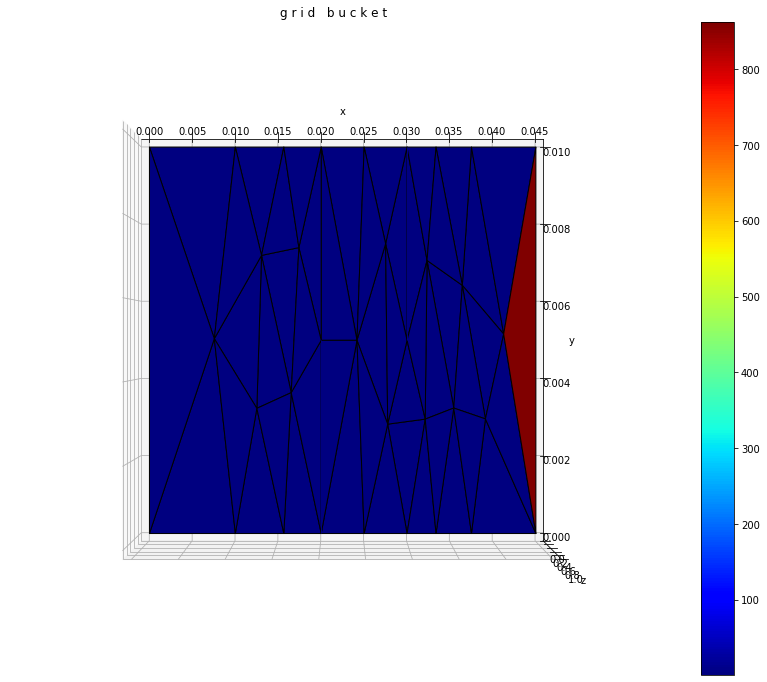

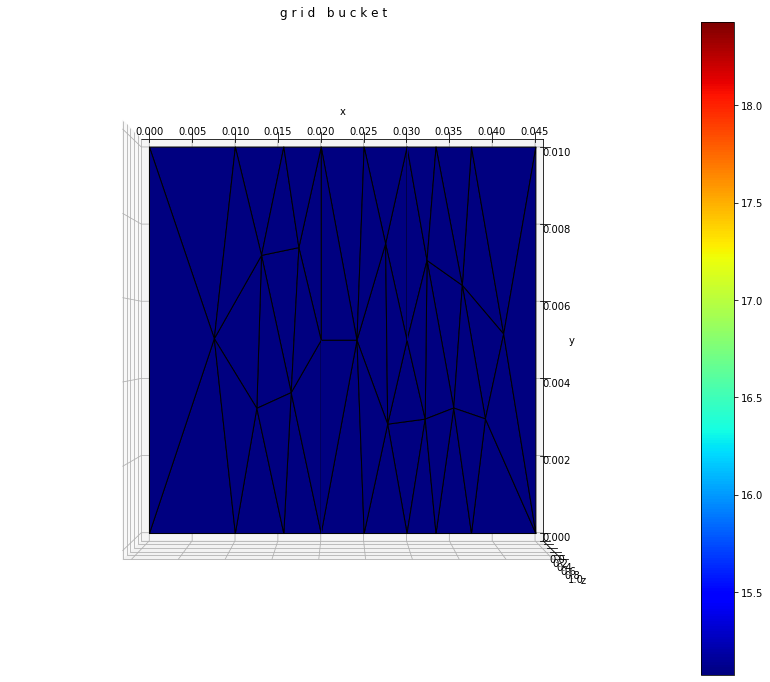

In [23]:
rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):
for i in range(1,n_steps+1,1):
    rd=reaction.compute_rd(tracer1,rd)
    if np.isclose((i-1) % save_every, 0):
            exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
            exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
            for g,d in gb:
                print("Ca")
                print(d[pp.STATE]["Ca"])
            for g,d in gb1:
                print("CaSiO3")
                print(d[pp.STATE]["CaSiO3"])
            print("FINE")
            print("rd")
            print(rd)
    
    #rd=reaction.compute_rd(tracer1,rd)
    #tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    #tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3)
    
    
    assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
    assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
    print("tracer1")
    print(tracer1)
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport_CaSiO3.plot_tracer(CaSiO3)
